In [38]:
from tensorflow import keras

fashionMnist = keras.datasets.fashion_mnist
(train_data, train_lables), (test_data, test_lables) = fashionMnist.load_data()
print(test_data.shape)
print(test_lables.shape)
print(test_lables[1:10])
train_data = train_data / 255.0
test_data = test_data / 255.0
train_data = train_data.reshape(-1, 28, 28, 1)
test_data = test_data.reshape(-1, 28, 28, 1)
train_lables = keras.utils.to_categorical(train_lables, 10)
test_lables = keras.utils.to_categorical(test_lables, 10)
print(test_data.shape)

(10000, 28, 28)
(10000,)
[2 1 1 6 1 4 6 5 7]
(10000, 28, 28, 1)


In [39]:
batch_size = 128
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, strides=1, activation='relu', data_format="channels_last",
                        input_shape=(28, 28, 1),
                        use_bias=True,
                        batch_size=batch_size),
    keras.layers.MaxPool2D((2, 2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10),
    keras.layers.Activation("softmax")
])
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (128, 26, 26, 32)         320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (128, 13, 13, 32)         0         
_________________________________________________________________
flatten_14 (Flatten)         (128, 5408)               0         
_________________________________________________________________
dense_28 (Dense)             (128, 128)                692352    
_________________________________________________________________
dense_29 (Dense)             (128, 10)                 1290      
_________________________________________________________________
activation_2 (Activation)    (128, 10)                 0         
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_______________________________________________

In [41]:
model.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer=keras.optimizers.SGD(learning_rate=0.1),
              metrics=['accuracy'])

class TestCallback(keras.callbacks.Callback):
    def __init__(self):
        super(TestCallback, self).__init__()
        self.loss = []
        self.acc = []

    def on_epoch_end(self, epoch, logs=None):
        (loss, acc) = self.model.evaluate(test_data, test_lables, batch_size=128, verbose=True)
        self.loss.append(loss)
        self.acc.append(acc)


callbacks = TestCallback()

h = model.fit(train_data, train_lables, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4040 - accuracy: 0.8515
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2986 - accuracy: 0.8915
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2600 - accuracy: 0.9046
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2304 - accuracy: 0.9153
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2071 - accuracy: 0.9231
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1887 - accuracy: 0.9306
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1704 - accuracy: 0.9366
Epoch 8/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1559 - accuracy: 0.9419
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1422 - accuracy: 0.9475
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - l

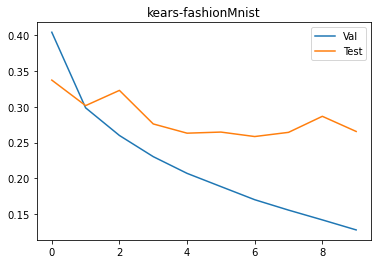

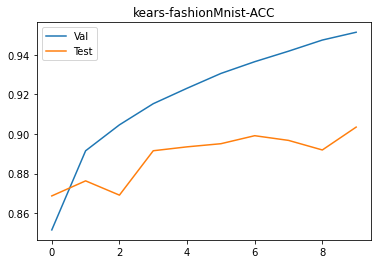

In [48]:
from matplotlib import pyplot as plt
from learning.pytorchExt import PytorchExt

def pltshow( title, loss_train, loss_test):
    plt.plot([i for i in range(len(loss_train))], loss_train)
    plt.plot([i for i in range(len(loss_test))], loss_test)
    plt.title(title)
    plt.legend(["Val", "Test"])
    plt.show()

pltshow("kears-fashionMnist", h.history['loss'], callbacks.loss)
pltshow("kears-fashionMnist-ACC", h.history['accuracy'], callbacks.acc)